In [3]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
os.chdir("/content/gdrive/My Drive")
#dir()
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install netcdf4
!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1" "basemap-data-hires == 1.3.0b1"
!pip install basemap
from netCDF4 import Dataset
from netCDF4 import num2date
from mpl_toolkits.basemap import Basemap
import mpl_toolkits.basemap as basemap
import getpass

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Cargar datos

## Viento

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Viento/California/Data_anual/'
ifile = 'GLOBAL_REANALYSIS_PHY_Viento.nc' # Elegir el archivo .nc
d1_C_W = xr.open_dataset(ifile)
#d1_C_W=d1_C_W.sel(time=filtro_meses(d1_C_W['time.month']))
d1_C_W.lon.values[d1_C_W.lon.values < 0] = d1_C_W.lon.values[d1_C_W.lon.values < 0] + 360 # convertir a 0-360 ªE
lat2d, lon2d = d1_C_W['lat'].values,d1_C_W['lon'].values #vectores 2D lat y 2D lon

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Viento/California/Data_anual


In [ ]:
d1_C_W

<xarray.Dataset>
Dimensions:         (time: 9861, lat: 121, lon: 81)
Coordinates:
  * time            (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lat             (lat) float32 20.0 20.25 20.5 20.75 ... 49.5 49.75 50.0
  * lon             (lon) float32 230.0 230.2 230.5 230.8 ... 249.5 249.8 250.0
Data variables:
    eastward_wind   (time, lat, lon) float64 ...
    northward_wind  (time, lat, lon) float64 ...

In [ ]:
tiempos= d1_C_W.time.values
tiempos

array(['1993-01-01T00:00:00.000000000', '1993-01-02T00:00:00.000000000',
       '1993-01-03T00:00:00.000000000', ...,
       '2019-12-29T00:00:00.000000000', '2019-12-30T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

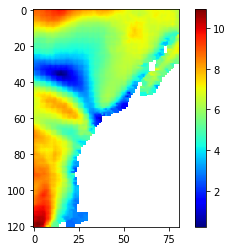

In [ ]:
plt.imshow(np.sqrt(d1_C_W.eastward_wind.values[0,:,:]**2 + d1_C_W.northward_wind.values[0,:,:]**2), cmap='jet')
plt.colorbar()

In [ ]:
#~mask sobre tierra
indices=np.where(~np.isnan(d1_C_W.eastward_wind.values[0,:,:])== True,1, np.nan)
indices

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1., ..., nan, nan, nan],
       [ 1.,  1.,  1., ..., nan, nan, nan],
       [ 1.,  1.,  1., ..., nan, nan, nan]])

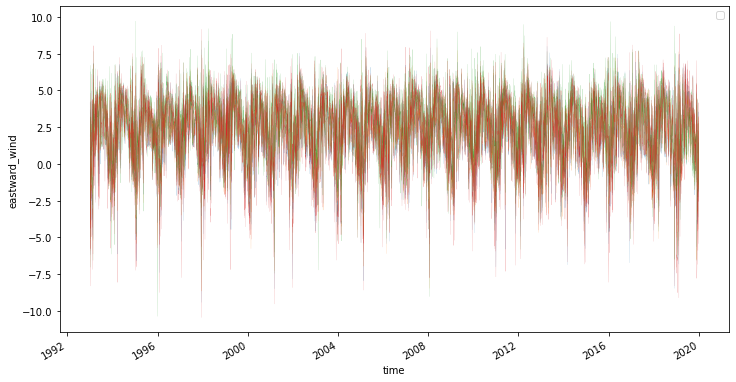

In [ ]:
U_Arena= d1_C_W.sel(lon=-123.5+360,lat=38.5).eastward_wind.drop(['lat','lon'])
U_Reyes= d1_C_W.sel(lon=-123+360,lat=38).eastward_wind.drop(['lat','lon'])
U_Nuevo= d1_C_W.sel(lon=-122+360,lat=37).eastward_wind.drop(['lat','lon'])
U_Conception= d1_C_W.sel(lon=-120.75+360,lat=34.5).eastward_wind.drop(['lat','lon'])
plt.figure(figsize=(12,6))
U_Reyes.plot(linewidth=0.1)
U_Nuevo.plot(linewidth=0.1)
U_Conception.plot(linewidth=0.1)
U_Arena.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_U=pd.concat([U_Arena.to_dataframe(),U_Reyes.to_dataframe(),U_Nuevo.to_dataframe(),U_Conception.to_dataframe()],axis=1)
df_U.columns=['Pt Arena','Pt Reyes','Año Nuevo','Conception']
df_U.to_csv('U_California.csv',index=True,sep=',')
df_U.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Pt Arena,Pt Reyes,Año Nuevo,Conception
time,,,,
1993-01-01,4.174805,3.687256,1.629883,1.842529
1993-01-02,2.010010,2.007568,2.505127,3.197266
1993-01-03,0.684814,0.575195,0.997803,0.752197
1993-01-04,0.852539,-0.637451,-1.087402,-1.539795
1993-01-05,-1.442383,-1.977539,-2.260010,-2.324951


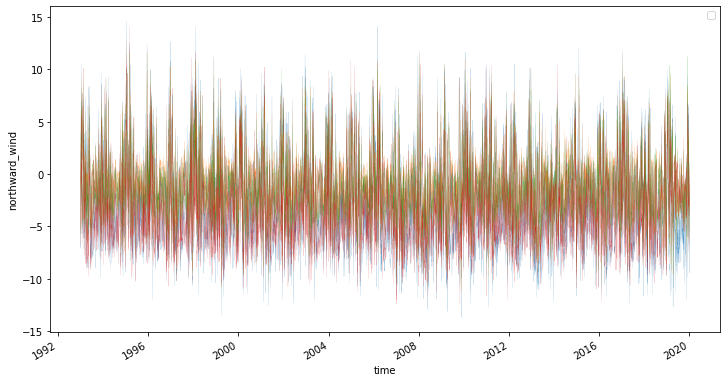

In [ ]:
V_Arena= d1_C_W.sel(lon=-123.5+360,lat=38.5).northward_wind.drop(['lat','lon'])
V_Reyes= d1_C_W.sel(lon=-123+360,lat=38).northward_wind.drop(['lat','lon'])
V_Nuevo= d1_C_W.sel(lon=-122+360,lat=37).northward_wind.drop(['lat','lon'])
V_Conception= d1_C_W.sel(lon=-120.75+360,lat=34.5).northward_wind.drop(['lat','lon'])
plt.figure(figsize=(12,6))
V_Arena.plot(linewidth=0.1)
V_Reyes.plot(linewidth=0.1)
V_Nuevo.plot(linewidth=0.1)
V_Conception.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_V=pd.concat([V_Arena.to_dataframe(),V_Reyes.to_dataframe(),V_Nuevo.to_dataframe(),V_Conception.to_dataframe()],axis=1)
df_V.columns=['Pt Arena','Pt Reyes','Año Nuevo','Conception']
df_V.to_csv('V_California.csv',index=True,sep=',')
df_V.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Pt Arena,Pt Reyes,Año Nuevo,Conception
time,,,,
1993-01-01,-0.235107,2.919922,3.972412,0.332520
1993-01-02,-7.090088,-5.232666,-5.687500,-5.392578
1993-01-03,-5.804932,-4.445068,-5.107422,-6.844971
1993-01-04,-0.997803,0.350098,-0.794922,-1.980225
1993-01-05,2.217773,1.199951,1.167480,2.244873


In [ ]:
# Hovmoller
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
U_H=d1_C_W.groupby('lat').mean('lon').eastward_wind.to_dataframe().reset_index()
V_H=d1_C_W.groupby('lat').mean('lon').northward_wind.to_dataframe().reset_index()
U_H.to_csv('Hovmoller_U_California.csv',sep=',')
V_H.to_csv('Hovmoller_V_California.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Presion

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_PRESION_ATMOSFERICA/California/'
ifile = 'California_Presion_atmosferica.nc' # Elegir el archivo .nc
var = 'sp' # elegir la variable de interes (Pascales)
d1_P = xr.open_dataset(ifile) # filtrar la variable del archivo de interes
d1_P=d1_P.rename(name_dict={'longitude':'lon','latitude':'lat'}) # cambiar nombre de lat y lon
d1_P= d1_P[var] #seleccionar variable de interes
#d1_P=d1_P.sel(lon=slice(-130,-110),lat=slice(20,50)) # recortar el xarray
d1_P=d1_P.reindex(lat=list(reversed(d1_P.lat))) # Invertir valores de lat para qye queden iguales
d1_P=d1_P.assign_coords({"lon": d1_P.lon + 360}) # cambiar coordenadas de lon
#d1_P=d1_P.sel(time=filtro_meses(d1_P['time.month']))
d1_P=d1_P.sel(lon=slice(-130+360,-110+360),lat=slice(20,50)) # recortar el xarray
d1_P.values= d1_P.values*indices # masking sobre tierra
d1_P

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_PRESION_ATMOSFERICA/California


<xarray.DataArray 'sp' (time: 9861, lat: 121, lon: 81)>
array([[[101435.5703125, 101439.2421875, 101444.125    , ...,
         101242.5      , 101229.3984375, 101223.09375  ],
        [101458.53125  , 101459.71875  , 101460.8671875, ...,
         101244.1640625, 101233.25     , 101230.0625   ],
        [101480.5703125, 101483.2734375, 101484.4609375, ...,
         101248.03125  , 101231.625    , 101229.5234375],
        ...,
        [101794.71875  , 101779.3984375, 101729.53125  , ...,
                    nan,            nan,            nan],
        [101801.625    , 101752.7265625, 101703.2734375, ...,
                    nan,            nan,            nan],
        [101765.4375   , 101721.03125  , 101715.4609375, ...,
                    nan,            nan,            nan]],

       [[101450.3359375, 101456.1171875, 101462.4765625, ...,
         101415.7578125, 101406.1640625, 101402.7265625],
        [101464.5703125, 101467.75     , 101470.5546875, ...,
         101421.0546875, 101413.5078125, 101413.2265625],
        [101476.3203125, 101480.9375   , 101483.8046875, ...,
         101428.3046875, 101414.96875  , 101416.2109375],
...
        [101790.6015625, 101824.0703125, 101827.2265625, ...,
                    nan,            nan,            nan],
        [101741.21875  , 101746.1484375, 101749.3984375, ...,
                    nan,            nan,            nan],
        [101652.3828125, 101661.8828125, 101712.5390625, ...,
                    nan,            nan,            nan]],

       [[101939.9140625, 101934.2578125, 101929.0625   , ...,
         101425.4921875, 101417.3828125, 101416.9609375],
        [101956.53125  , 101948.4453125, 101938.7734375, ...,
         101433.90625  , 101428.2578125, 101432.1015625],
        [101970.1484375, 101963.1953125, 101953.4140625, ...,
         101444.96875  , 101432.9921875, 101438.4140625],
        ...,
        [100605.15625  , 100632.5078125, 100629.1484375, ...,
                    nan,            nan,            nan],
        [100547.28125  , 100543.34375  , 100539.90625  , ...,
                    nan,            nan,            nan],
        [100452.8125   , 100452.8359375, 100491.8203125, ...,
                    nan,            nan,            nan]]])
Coordinates:
  * lat      (lat) float32 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lon      (lon) float32 230.0 230.2 230.5 230.8 ... 249.2 249.5 249.8 250.0

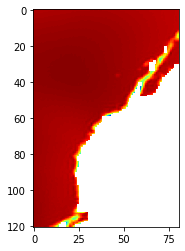

In [ ]:
plt.imshow(d1_P.values[0,:,:],cmap='jet')

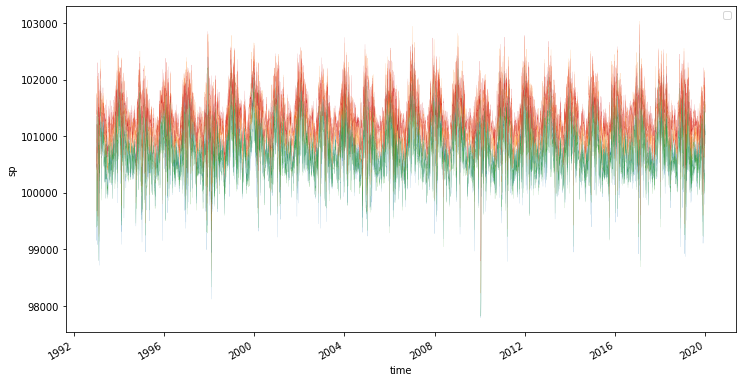

In [ ]:
P_Arena= d1_P.sel(lon=-123.5+360,lat=38.5).drop(['lat','lon'])
P_Reyes= d1_P.sel(lon=-123+360,lat=38).drop(['lat','lon'])
P_Nuevo= d1_P.sel(lon=-122+360,lat=37).drop(['lat','lon'])
P_Conception= d1_P.sel(lon=-120.75+360,lat=34.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
P_Arena.plot(linewidth=0.1)
P_Reyes.plot(linewidth=0.1)
P_Nuevo.plot(linewidth=0.1)
P_Conception.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_P=pd.concat([P_Arena.to_dataframe(),P_Reyes.to_dataframe(),P_Nuevo.to_dataframe(),P_Conception.to_dataframe()],axis=1)
df_P.columns=['Pt Arena','Pt Reyes','Año Nuevo','Conception']
df_P.to_csv('P_California.csv',index=True,sep=',')
df_P.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Pt Arena,Pt Reyes,Año Nuevo,Conception
time,,,,
1993-01-01,100436.531250,100878.179688,100548.937500,101463.898438
1993-01-02,100942.156250,101322.273438,100772.250000,101381.117188
1993-01-03,101352.226562,101756.148438,101212.031250,101723.554688
1993-01-04,101169.593750,101620.875000,101131.132812,101732.632812
1993-01-05,100520.554688,100972.937500,100518.312500,101200.664062


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
P_H=d1_P.groupby('lat').mean('lon').to_dataframe().reset_index()
P_H.to_csv('Hovmoller_P_California.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Temperatura

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_TEMPERATURA_ATMOSFERICA/California/'
ifile = 'California_Taire.nc' # Elegir el archivo .nc
var='t2m'
d1_T= xr.open_dataset(ifile)
d1_T=d1_T.rename(name_dict={'longitude':'lon','latitude':'lat'}) # cambiar nombre de lat y lon
d1_T= d1_T[var] #seleccionar variable de interes
d1_T=d1_T.reindex(lat=list(reversed(d1_T.lat))) # Invertir valores de lat para qye queden iguales
d1_T=d1_T.assign_coords({"lon": d1_T.lon + 360}) # cambiar coordenadas de lon
#d1_T=d1_T.sel(time=filtro_meses(d1_T['time.month']))
d1_T=d1_T.sel(lon=slice(-130+360,-110+360),lat=slice(20,50)) # recortar el xarray
d1_T.values= d1_T.values*indices # masking sobre tierra
d1_T

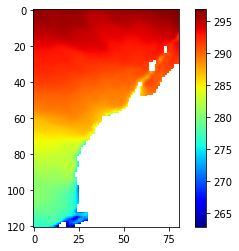

In [ ]:
plt.imshow(d1_T.values[12,:,:],cmap='jet')
plt.colorbar()

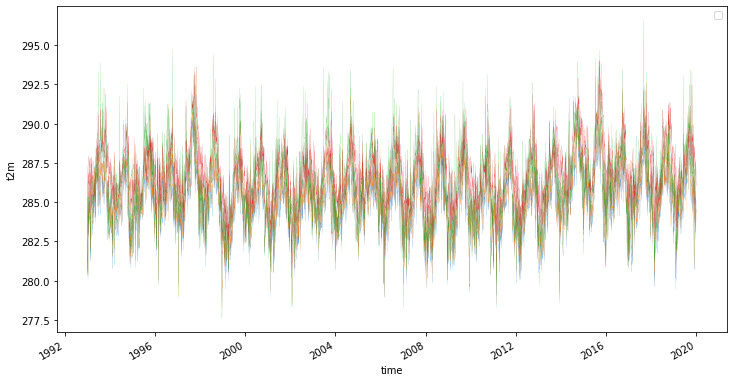

In [ ]:
T_Arena= d1_T.sel(lon=-123.5+360,lat=38.5).drop(['lat','lon'])
T_Reyes= d1_T.sel(lon=-123+360,lat=38).drop(['lat','lon'])
T_Nuevo= d1_T.sel(lon=-122+360,lat=37).drop(['lat','lon'])
T_Conception= d1_T.sel(lon=-120.75+360,lat=34.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
T_Arena.plot(linewidth=0.1)
T_Reyes.plot(linewidth=0.1)
T_Nuevo.plot(linewidth=0.1)
T_Conception.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_T=pd.concat([T_Arena.to_dataframe(),T_Reyes.to_dataframe(),T_Nuevo.to_dataframe(),T_Conception.to_dataframe()],axis=1)
df_T.columns=['Pt Arena','Pt Reyes','Año Nuevo','Conception']
df_T.to_csv('T_California.csv',index=True,sep=',')
df_T.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Pt Arena,Pt Reyes,Año Nuevo,Conception
time,,,,
1993-01-01,282.692047,283.897888,284.698517,286.210175
1993-01-02,280.571930,280.886749,280.966187,284.416779
1993-01-03,280.722656,280.724915,280.400604,283.014648
1993-01-04,281.502106,281.555481,280.350494,284.422516
1993-01-05,281.692474,282.438812,280.777802,285.339020


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
T_H=d1_T.groupby('lat').mean('lon').to_dataframe().reset_index()
T_H.to_csv('Hovmoller_T_California.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Radiacion onda corta (Qsw)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_RADIACION_ONDA_CORTA(QSW)/California/'
ifile = 'California_QSW.nc' # Elegir el archivo .nc
var='ssrd'
d1_Q= xr.open_dataset(ifile)
d1_Q=d1_Q.rename(name_dict={'longitude':'lon','latitude':'lat'}) # cambiar nombre de lat y lon
d1_Q= d1_Q[var] #seleccionar variable de interes
d1_Q=d1_Q.reindex(lat=list(reversed(d1_Q.lat))) # Invertir valores de lat para qye queden iguales
d1_Q=d1_Q.assign_coords({"lon": d1_Q.lon + 360}) # cambiar coordenadas de lon
#d1_Q=d1_Q.sel(time=filtro_meses(d1_Q['time.month']))
d1_Q=d1_Q.sel(lon=slice(-130+360,-110+360),lat=slice(20,50)) # recortar el xarray
d1_Q.values= d1_Q.values*indices # masking sobre tierra
d1_Q

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_RADIACION_ONDA_CORTA(QSW)/California


<xarray.DataArray 'ssrd' (time: 9861, lat: 121, lon: 81)>
array([[[508432.03125   , 509594.46875   , 513732.375     , ...,
         658570.75      , 668518.3125    , 657030.0625    ],
        [496298.28125   , 496666.46875   , 483019.78125   , ...,
         650468.9375    , 660159.3125    , 659128.        ],
        [487581.28125   , 485738.        , 472106.46875   , ...,
         643867.5625    , 649813.4375    , 656603.9375    ],
        ...,
        [ 81226.9921875 ,  81469.0625    ,  82911.3984375 , ...,
                     nan,             nan,             nan],
        [ 77469.8671875 ,  75719.9140625 ,  77157.2109375 , ...,
                     nan,             nan,             nan],
        [ 74754.1484375 ,  72794.90625   ,  72169.5546875 , ...,
                     nan,             nan,             nan]],

       [[527974.1875    , 525929.1875    , 520767.53125   , ...,
         714504.        , 718765.4375    , 719718.5       ],
        [515890.84375   , 515923.625     , 518825.90625   , ...,
         711795.75      , 715820.1875    , 716712.8125    ],
        [505126.25      , 517547.5       , 520452.34375   , ...,
         709032.1875    , 711737.8125    , 712537.1875    ],
...
        [ 30431.99023438,  30932.49023438,  31137.234375  , ...,
                     nan,             nan,             nan],
        [ 27805.625     ,  28217.64648438,  28422.40039062, ...,
                     nan,             nan,             nan],
        [ 25897.140625  ,  26326.86914062,  26994.203125  , ...,
                     nan,             nan,             nan]],

       [[521600.84375   , 525754.        , 524957.75      , ...,
         163636.171875  , 175751.8125    , 181272.484375  ],
        [506598.40625   , 512460.375     , 518236.34375   , ...,
         165274.15625   , 176558.171875  , 182005.546875  ],
        [468145.75      , 482076.375     , 487857.40625   , ...,
         179687.578125  , 186388.75      , 189927.640625  ],
        ...,
        [ 34428.41796875,  33854.609375  ,  33141.765625  , ...,
                     nan,             nan,             nan],
        [ 30621.56835938,  29989.63085938,  29286.90625   , ...,
                     nan,             nan,             nan],
        [ 26703.5       ,  26084.19726562,  25553.36523438, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * lat      (lat) float32 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lon      (lon) float32 230.0 230.2 230.5 230.8 ... 249.2 249.5 249.8 250.0

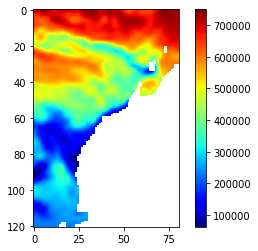

In [ ]:
plt.imshow(d1_Q.values[12,:,:],cmap='jet')
plt.colorbar()

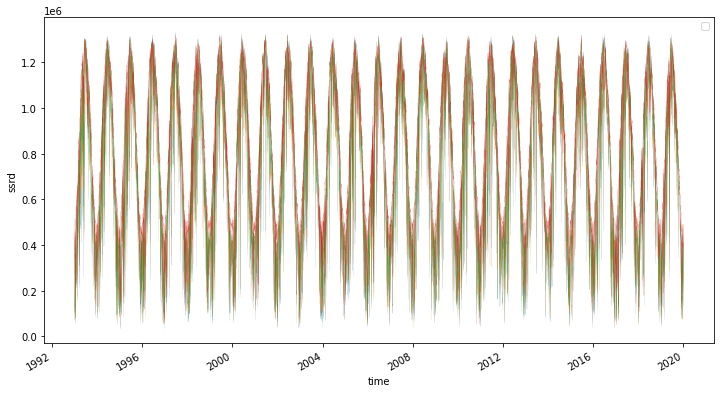

In [ ]:
Q_Arena= d1_Q.sel(lon=-123.5+360,lat=38.5).drop(['lat','lon'])
Q_Reyes= d1_Q.sel(lon=-123+360,lat=38).drop(['lat','lon'])
Q_Nuevo= d1_Q.sel(lon=-122+360,lat=37).drop(['lat','lon'])
Q_Conception= d1_Q.sel(lon=-120.75+360,lat=34.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
Q_Arena.plot(linewidth=0.1)
Q_Reyes.plot(linewidth=0.1)
Q_Nuevo.plot(linewidth=0.1)
Q_Conception.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_Q=pd.concat([Q_Arena.to_dataframe(),Q_Reyes.to_dataframe(),Q_Nuevo.to_dataframe(),Q_Conception.to_dataframe()],axis=1)
df_Q.columns=['Pt Arena','Pt Reyes','Año Nuevo','Conception']
df_Q.to_csv('Q_California.csv',index=True,sep=',')
df_Q.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Pt Arena,Pt Reyes,Año Nuevo,Conception
time,,,,
1993-01-01,337094.625000,307395.718750,98726.617188,273576.593750
1993-01-02,418417.468750,426378.000000,412423.656250,454072.281250
1993-01-03,406281.156250,438970.656250,453295.656250,511634.406250
1993-01-04,196104.171875,335112.687500,444833.281250,323387.437500
1993-01-05,152435.828125,215318.453125,215182.296875,221922.421875


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
Q_H=d1_Q.groupby('lat').mean('lon').to_dataframe().reset_index()
Q_H.to_csv('Hovmoller_Q_California.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Corrientes

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Corrientes/California/Data_anual/'
ifile = 'GLOBAL_REANALYSIS_PHY_Corrientes.nc' # Elegir el archivo .nc
d1_C = xr.open_dataset(ifile)
#d1_C=d1_C.sel(time=filtro_meses(d1_C['time.month']))
d1_C.lon.values[d1_C.lon.values < 0] = d1_C.lon.values[d1_C.lon.values < 0] + 360 # convertir a 0-360 ªE
lat2d, lon2d = d1_C['lat'].values,d1_C['lon'].values #vectores 2D lat y 2D lon

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Corrientes/California/Data_anual


In [ ]:
d1_C

<xarray.Dataset>
Dimensions:  (lon: 81, lat: 121, time: 9861)
Coordinates:
  * lon      (lon) float32 230.0 230.2 230.5 230.8 ... 249.2 249.5 249.8 250.0
  * lat      (lat) float32 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
    depth    float32 ...
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
Data variables:
    U        (time, lat, lon) float32 ...
    V        (time, lat, lon) float32 ...
Attributes: (12/15)
    product:                       GLOBAL_REANALYSIS_PHY_001_031
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    area:                          Global
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    credit:                        E.U. Copernicus Marine Service Information...
    ...                            ...
    institution:                   Mercator Ocean
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    history:                       Creation 2022-Mar-05 02:35:00 GMT+0200
    title:                         Daily mean fields for product GLOBAL_REANA...
    source:                        Copernicus Marine Service
    dataset:                       global-reanalysis-phy-001-031-grepv2-daily

In [ ]:
tiempos= d1_C.time.values
tiempos

array(['1993-01-01T00:00:00.000000000', '1993-01-02T00:00:00.000000000',
       '1993-01-03T00:00:00.000000000', ...,
       '2019-12-29T00:00:00.000000000', '2019-12-30T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

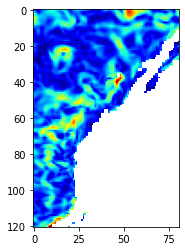

In [ ]:
plt.imshow(np.sqrt(d1_C.U.values[0,:,:]**2 + d1_C.V.values[0,:,:]**2), cmap='jet')

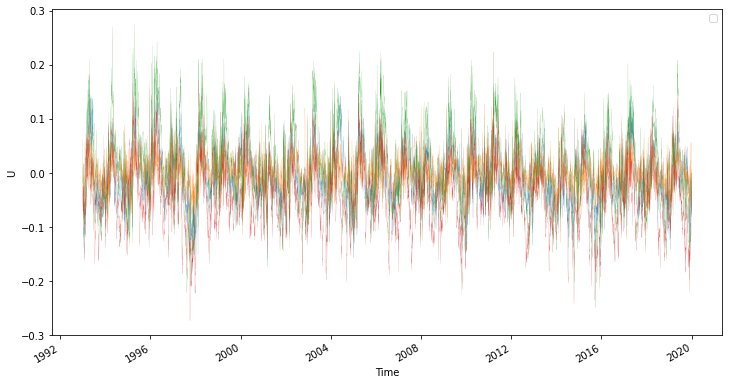

In [ ]:
U_Arena= d1_C.sel(lon=-123.5+360,lat=38.5).U.drop(['lat','lon','depth'])
U_Reyes= d1_C.sel(lon=-123+360,lat=38).U.drop(['lat','lon','depth'])
U_Nuevo= d1_C.sel(lon=-122+360,lat=37).U.drop(['lat','lon','depth'])
U_Conception= d1_C.sel(lon=-120.75+360,lat=34.5).U.drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
U_Arena.plot(linewidth=0.1)
U_Reyes.plot(linewidth=0.1)
U_Nuevo.plot(linewidth=0.1)
U_Conception.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_U=pd.concat([U_Arena.to_dataframe(),U_Reyes.to_dataframe(),U_Nuevo.to_dataframe(),U_Conception.to_dataframe()],axis=1)
df_U.columns=['Pt Arena','Pt Reyes','Año Nuevo','Conception']
df_U.to_csv('UO_California.csv',index=True,sep=',')
df_U.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Pt Arena,Pt Reyes,Año Nuevo,Conception
time,,,,
1993-01-01,-0.040128,0.010521,0.061813,-0.024164
1993-01-02,-0.062509,-0.041879,-0.019072,-0.049060
1993-01-03,-0.044689,-0.027869,0.007732,-0.070122
1993-01-04,-0.031219,-0.007660,0.016191,-0.065911
1993-01-05,-0.037706,-0.008402,-0.008851,-0.076650


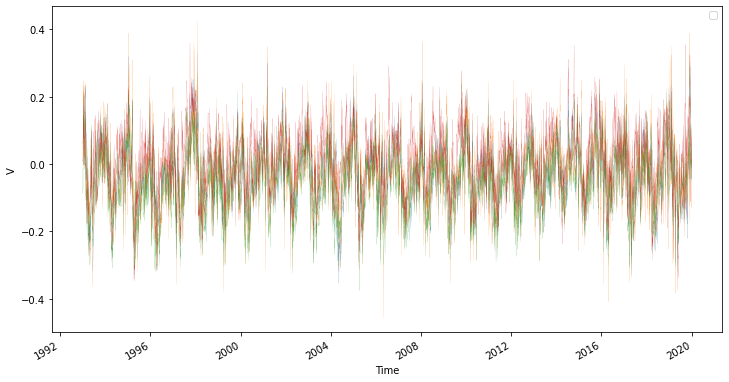

In [ ]:
V_Arena= d1_C.sel(lon=-123.5+360,lat=38.5).V.drop(['lat','lon','depth'])
V_Reyes= d1_C.sel(lon=-123+360,lat=38).V.drop(['lat','lon','depth'])
V_Nuevo= d1_C.sel(lon=-122+360,lat=37).V.drop(['lat','lon','depth'])
V_Conception= d1_C.sel(lon=-120.75+360,lat=34.5).V.drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
V_Arena.plot(linewidth=0.1)
V_Reyes.plot(linewidth=0.1)
V_Nuevo.plot(linewidth=0.1)
V_Conception.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_V=pd.concat([V_Arena.to_dataframe(),V_Reyes.to_dataframe(),V_Nuevo.to_dataframe(),V_Conception.to_dataframe()],axis=1)
df_V.columns=['Pt Arena','Pt Reyes','Año Nuevo','Conception']
df_V.to_csv('VO_California.csv',index=True,sep=',')
df_V.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Pt Arena,Pt Reyes,Año Nuevo,Conception
time,,,,
1993-01-01,0.070951,0.081087,-0.013890,0.013800
1993-01-02,0.061237,0.002944,-0.086348,0.007252
1993-01-03,0.062116,-0.014223,-0.073947,0.018360
1993-01-04,0.070044,0.022558,-0.033698,0.074117
1993-01-05,0.094462,0.091309,0.030049,0.109513


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
U_H=d1_C.groupby('lat').mean('lon').U.drop('depth').to_dataframe().reset_index()
V_H=d1_C.groupby('lat').mean('lon').V.drop('depth').to_dataframe().reset_index()
U_H.to_csv('Hovmoller_UO_California.csv',sep=',')
V_H.to_csv('Hovmoller_VO_California.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## SST

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/OSTIA_SST/California/Data_anual/'
var = 'SST' # elegir la variable de interes
ifile = 'OSTIA_SST.nc' # Elegir el archivo .nc
d1_SST = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_SST=d1_SST.sel(time=filtro_meses(d1_SST['time.month']))
d1_SST.lon.values[d1_SST.lon.values < 0] = d1_SST.lon.values[d1_SST.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_SST

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/OSTIA_SST/California/Data_anual


<xarray.DataArray 'SST' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 230.0 230.2 230.5 230.8 ... 249.2 249.5 249.8 250.0
  * lat      (lat) float64 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

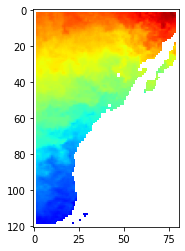

In [ ]:
plt.imshow(d1_SST.values[0,:,:],cmap='jet')

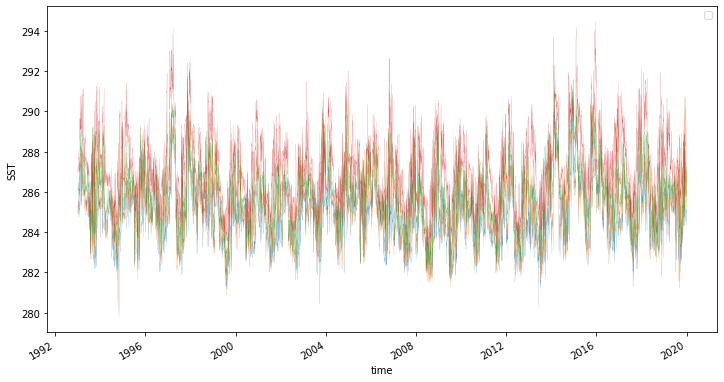

In [ ]:
T_Arena= d1_SST.sel(lon=-123.5+360,lat=38.5).drop(['lat','lon'])
T_Reyes= d1_SST.sel(lon=-123+360,lat=38).drop(['lat','lon'])
T_Nuevo= d1_SST.sel(lon=-122.25+360,lat=37).drop(['lat','lon'])
T_Conception= d1_SST.sel(lon=-120.75+360,lat=34.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
T_Arena.plot(linewidth=0.1)
T_Reyes.plot(linewidth=0.1)
T_Nuevo.plot(linewidth=0.1)
T_Conception.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_T=pd.concat([T_Arena.to_dataframe(),T_Reyes.to_dataframe(),T_Nuevo.to_dataframe(),T_Conception.to_dataframe()],axis=1)
df_T.columns=['Pt Arena','Pt Reyes','Año Nuevo','Conception']
df_T.to_csv('SST_California.csv',index=True,sep=',')
df_T.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Pt Arena,Pt Reyes,Año Nuevo,Conception
time,,,,
1993-01-01,285.310002,285.047495,286.097497,287.192490
1993-01-02,285.087496,284.929988,286.187484,286.969996
1993-01-03,285.039994,284.882486,286.189993,286.959995
1993-01-04,284.992485,284.882494,286.169982,286.922496
1993-01-05,285.012481,284.792493,286.072487,286.999990


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
SST_H=d1_SST.groupby('lat').mean('lon').to_dataframe().reset_index()
SST_H.to_csv('Hovmoller_SST_California.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Salinidad

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSS/California/Data_anual/'
var = 'SSS' # elegir la variable de interes
ifile = 'GLOBAL_REANALYSIS_PHY_SSS.nc' # Elegir el archivo .nc
d1_S = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_S=d1_S.sel(time=filtro_meses(d1_S['time.month']))
d1_S.lon.values[d1_S.lon.values < 0] = d1_S.lon.values[d1_S.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_S

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSS/California/Data_anual


<xarray.DataArray 'SSS' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 230.0 230.2 230.5 230.8 ... 249.2 249.5 249.8 250.0
  * lat      (lat) float32 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
    depth    float32 ...
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

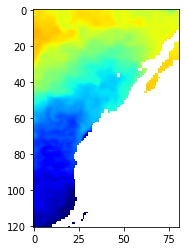

In [ ]:
plt.imshow(d1_S.values[0,:,:],cmap='jet',vmin=32, vmax=36)

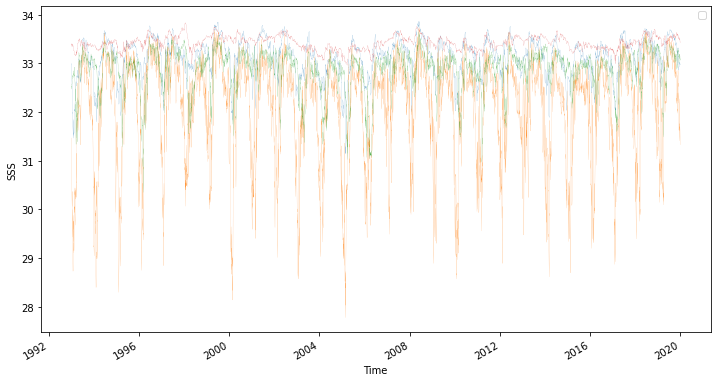

In [ ]:
S_Arena= d1_S.sel(lon=-123.5+360,lat=38.5).drop(['lat','lon','depth'])
S_Reyes= d1_S.sel(lon=-123+360,lat=38).drop(['lat','lon','depth'])
S_Nuevo= d1_S.sel(lon=-122+360,lat=37).drop(['lat','lon','depth'])
S_Conception= d1_S.sel(lon=-120.75+360,lat=34.5).drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
S_Arena.plot(linewidth=0.1)
S_Reyes.plot(linewidth=0.1)
S_Nuevo.plot(linewidth=0.1)
S_Conception.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_S=pd.concat([S_Arena.to_dataframe(),S_Reyes.to_dataframe(),S_Nuevo.to_dataframe(),S_Conception.to_dataframe()],axis=1)
df_S.columns=['Pt Arena','Pt Reyes','Año Nuevo','Conception']
df_S.to_csv('S_California.csv',index=True,sep=',')
df_S.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Pt Arena,Pt Reyes,Año Nuevo,Conception
time,,,,
1993-01-01,32.979282,31.466084,32.529682,33.354897
1993-01-02,32.987198,31.318111,32.513649,33.350788
1993-01-03,32.993229,31.260265,32.526165,33.365173
1993-01-04,32.993477,31.003685,32.511410,33.381767
1993-01-05,32.987869,30.692970,32.470390,33.393826


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
SSS_H=d1_S.groupby('lat').mean('lon').drop('depth').to_dataframe().reset_index()
SSS_H.to_csv('Hovmoller_S_California.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Oxigeno

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_BIO/California/Data_anual/'
var = 'o2' # elegir la variable de interes
ifile = 'GLOBAL_REANALYSIS_BIO.nc' # Elegir el archivo .nc
d1_O = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_O=d1_O.sel(time=filtro_meses(d1_O['time.month']))
d1_O.lon.values[d1_O.lon.values < 0] = d1_O.lon.values[d1_O.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_O

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_BIO/California/Data_anual


<xarray.DataArray 'o2' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 230.0 230.2 230.5 230.8 ... 249.2 249.5 249.8 250.0
  * lat      (lat) float32 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
    depth    float32 ...
  * time     (time) datetime64[ns] 1993-01-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    long_name:      Dissolved Oxygen
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mmol m-3
    unit_long:      millimoles of Oxygen per cubic meter
    valid_min:      0.24998258
    valid_max:      529.78735
    _ChunkSizes:    [  1  15 137 288]

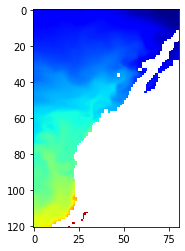

In [ ]:
plt.imshow(d1_O.values[0,:,:],cmap='jet')

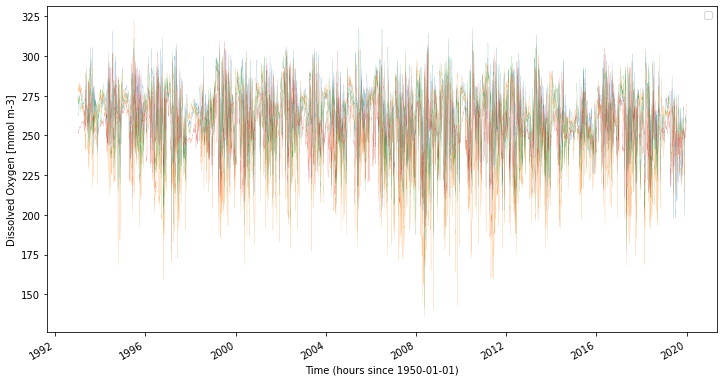

In [ ]:
O_Arena= d1_O.sel(lon=-123.5+360,lat=38.5).drop(['lat','lon','depth'])
O_Reyes= d1_O.sel(lon=-123+360,lat=38).drop(['lat','lon','depth'])
O_Nuevo= d1_O.sel(lon=-122+360,lat=37).drop(['lat','lon','depth'])
O_Conception= d1_O.sel(lon=-120.75+360,lat=34.5).drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
O_Arena.plot(linewidth=0.1)
O_Reyes.plot(linewidth=0.1)
O_Nuevo.plot(linewidth=0.1)
O_Conception.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_O=pd.concat([O_Arena.to_dataframe(),O_Reyes.to_dataframe(),O_Nuevo.to_dataframe(),O_Conception.to_dataframe()],axis=1)
df_O.columns=['Pt Arena','Pt Reyes','Año Nuevo','Conception']
df_O.to_csv('O_California.csv',index=True,sep=',')
df_O.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Pt Arena,Pt Reyes,Año Nuevo,Conception
time,,,,
1993-01-01 12:00:00,263.387421,271.971771,270.997925,253.120850
1993-01-02 12:00:00,263.432068,273.737000,271.958740,253.256577
1993-01-03 12:00:00,263.258148,274.635498,272.000031,253.276337
1993-01-04 12:00:00,263.193817,273.700043,272.272675,253.117081
1993-01-05 12:00:00,263.006989,273.220367,272.769897,252.631363


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
O_H=d1_O.groupby('lat').mean('lon').drop('depth').to_dataframe().reset_index()
O_H.to_csv('Hovmoller_O_California.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Clorofila

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_BIO/California/Data_anual/'
var = 'chl' # elegir la variable de interes
ifile = 'GLOBAL_REANALYSIS_BIO.nc' # Elegir el archivo .nc
d1_CHL = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_CHL=d1_CHL.sel(time=filtro_meses(d1_CHL['time.month']))
d1_CHL.lon.values[d1_CHL.lon.values < 0] = d1_CHL.lon.values[d1_CHL.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_CHL

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_BIO/California/Data_anual


<xarray.DataArray 'chl' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 230.0 230.2 230.5 230.8 ... 249.2 249.5 249.8 250.0
  * lat      (lat) float32 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
    depth    float32 ...
  * time     (time) datetime64[ns] 1993-01-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    long_name:      Total Chlorophyll
    standard_name:  mass_concentration_of_chlorophyll_a_in_sea_water
    units:          mg m-3
    unit_long:      milligram of Chlorophyll per cubic meter
    valid_min:      0.0026485976
    valid_max:      14.423477
    _ChunkSizes:    [  1  15 137 288]

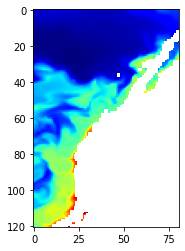

In [ ]:
plt.imshow(np.log10(d1_CHL.values[0,:,:]),cmap='jet')

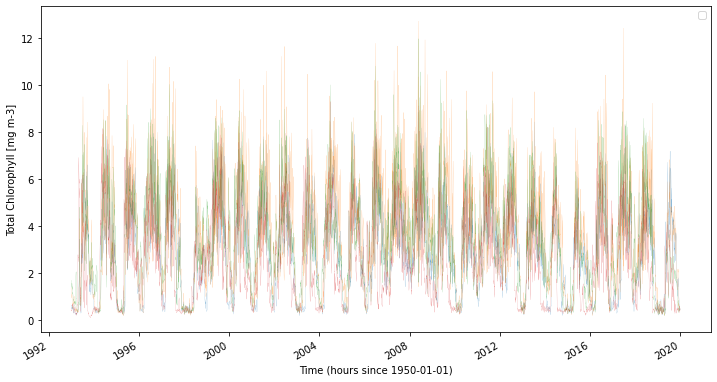

In [ ]:
C_Arena= d1_CHL.sel(lon=-123.5+360,lat=38.5).drop(['lat','lon','depth'])
C_Reyes= d1_CHL.sel(lon=-123+360,lat=38).drop(['lat','lon','depth'])
C_Nuevo= d1_CHL.sel(lon=-122+360,lat=37).drop(['lat','lon','depth'])
C_Conception= d1_CHL.sel(lon=-120.75+360,lat=34.5).drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
C_Arena.plot(linewidth=0.1)
C_Reyes.plot(linewidth=0.1)
C_Nuevo.plot(linewidth=0.1)
C_Conception.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Arena.to_dataframe(),C_Reyes.to_dataframe(),C_Nuevo.to_dataframe(),C_Conception.to_dataframe()],axis=1)
df_C.columns=['Pt Arena','Pt Reyes','Año Nuevo','Conception']
df_C.to_csv('CHL_California.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Pt Arena,Pt Reyes,Año Nuevo,Conception
time,,,,
1993-01-01 12:00:00,0.629136,1.370483,1.690700,0.388293
1993-01-02 12:00:00,0.610555,1.288157,1.683744,0.389342
1993-01-03 12:00:00,0.615029,1.198657,1.623353,0.406065
1993-01-04 12:00:00,0.630299,1.157144,1.610682,0.420495
1993-01-05 12:00:00,0.620549,1.174045,1.588173,0.414140


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
C_H=d1_CHL.groupby('lat').mean('lon').drop('depth').to_dataframe().reset_index()
C_H.to_csv('Hovmoller_CHL_California.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## SSH

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSH/California/Data_anual/'
var = 'SSH' # elegir la variable de interes
ifile='GLOBAL_REANALYSIS_PHY_SSH.nc'
d1_SSH = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
d1_SSH=d1_SSH.transpose('time', 'lat', 'lon')
#d1_SSH=d1_SSH.sel(time=filtro_meses(d1_SSH['time.month']))
d1_SSH.lon.values[d1_SSH.lon.values < 0] = d1_SSH.lon.values[d1_SSH.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_SSH

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSH/California/Data_anual


<xarray.DataArray 'SSH' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 230.0 230.2 230.5 230.8 ... 249.2 249.5 249.8 250.0
  * lat      (lat) float32 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

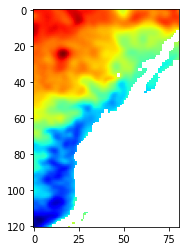

In [ ]:
plt.imshow(d1_SSH[0,:,:].values,cmap='jet')

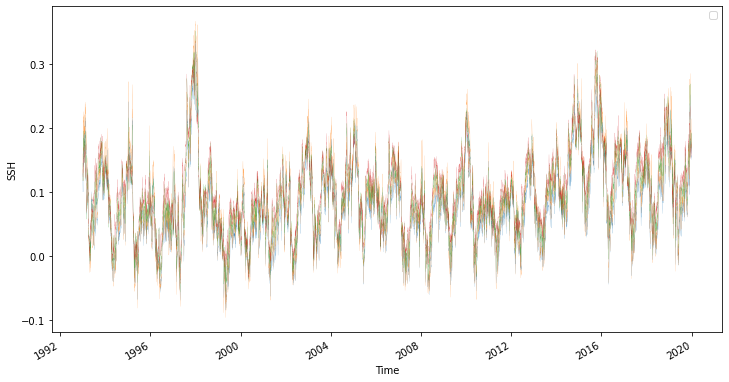

In [ ]:
C_Arena= d1_SSH.sel(lon=-123.5+360,lat=38.5).drop(['lat','lon'])
C_Reyes= d1_SSH.sel(lon=-123+360,lat=38).drop(['lat','lon'])
C_Nuevo= d1_SSH.sel(lon=-122+360,lat=37).drop(['lat','lon'])
C_Conception= d1_SSH.sel(lon=-120.75+360,lat=34.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
C_Arena.plot(linewidth=0.1)
C_Reyes.plot(linewidth=0.1)
C_Nuevo.plot(linewidth=0.1)
C_Conception.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Arena.to_dataframe(),C_Reyes.to_dataframe(),C_Nuevo.to_dataframe(),C_Conception.to_dataframe()],axis=1)
df_C.columns=['Pt Arena','Pt Reyes','Año Nuevo','Conception']
df_C.to_csv('SSH_California.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Pt Arena,Pt Reyes,Año Nuevo,Conception
time,,,,
1993-01-01,0.128649,0.159499,0.145321,0.135161
1993-01-02,0.110104,0.130768,0.127832,0.131230
1993-01-03,0.100144,0.117577,0.117236,0.123475
1993-01-04,0.103403,0.124102,0.120102,0.130804
1993-01-05,0.110913,0.138330,0.131831,0.138708


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
C_H=d1_SSH.groupby('lat').mean('lon').to_dataframe().reset_index()
C_H.to_csv('Hovmoller_SSH_California.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Rotor de viento

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Rotor_Viento/California/Data_anual/'
var = 'wind_stress_curl' # elegir la variable de interes
ifile='GLOBAL_Rotor_Viento.nc'
d1_Rotor = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_Rotor=d1_Rotor.sel(time=filtro_meses(d1_Rotor['time.month']))
d1_Rotor.lon.values[d1_Rotor.lon.values < 0] = d1_Rotor.lon.values[d1_Rotor.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_Rotor

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Rotor_Viento/California/Data_anual


<xarray.DataArray 'wind_stress_curl' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lat      (lat) float32 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
  * lon      (lon) float32 230.0 230.2 230.5 230.8 ... 249.2 249.5 249.8 250.0

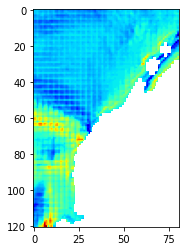

In [ ]:
plt.imshow(d1_Rotor.isel(time=0).values,cmap='jet')

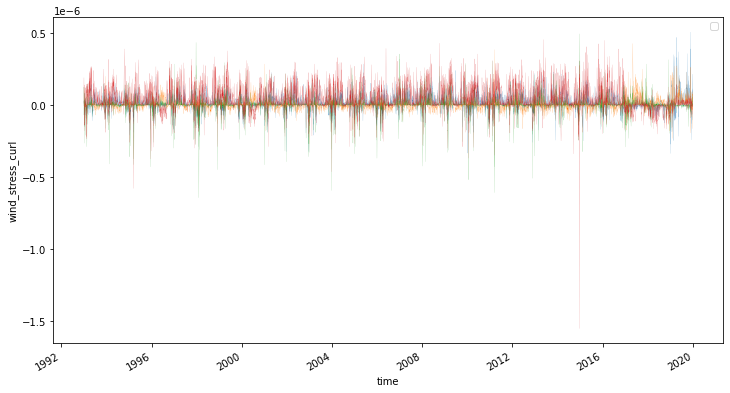

In [ ]:
C_Arena= d1_Rotor.sel(lon=-123.5+360,lat=38.5).drop(['lat','lon'])
C_Reyes= d1_Rotor.sel(lon=-123+360,lat=38).drop(['lat','lon'])
C_Nuevo= d1_Rotor.sel(lon=-122+360,lat=37).drop(['lat','lon'])
C_Conception= d1_Rotor.sel(lon=-120.75+360,lat=34.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
C_Arena.plot(linewidth=0.1)
C_Reyes.plot(linewidth=0.1)
C_Nuevo.plot(linewidth=0.1)
C_Conception.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Arena.to_dataframe(),C_Reyes.to_dataframe(),C_Nuevo.to_dataframe(),C_Conception.to_dataframe()],axis=1)
df_C.columns=['Pt Arena','Pt Reyes','Año Nuevo','Conception']
df_C.to_csv('Rotor_California.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Pt Arena,Pt Reyes,Año Nuevo,Conception
time,,,,
1993-01-01,9.778887e-09,2.514571e-08,-6.984919e-08,-4.656613e-09
1993-01-02,2.980232e-08,1.955777e-08,1.247972e-07,1.899898e-07
1993-01-03,1.955777e-08,5.122274e-09,6.007031e-08,3.492460e-08
1993-01-04,-5.122274e-09,0.000000e+00,0.000000e+00,-5.122274e-09
1993-01-05,-9.778887e-09,-1.490116e-08,5.122274e-09,-7.962808e-08


In [ ]:
np.nanmin(d1_Rotor.values),np.nanmax(d1_Rotor.values)

(-3.6749988794326782e-06, 3.7048012018203735e-06)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
R_H=d1_Rotor.groupby('lat').mean('lon').to_dataframe().reset_index()
#R_H
R_H.to_csv('Hovmoller_Rotor_California.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Estres viento

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Estres_Viento/California/Data_anual/'
var = 'wind_stress' # elegir la variable de interes
ifile='GLOBAL_Estres_Viento.nc'
d1_Estres = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_Estres=d1_Estres.sel(time=filtro_meses(d1_Estres['time.month']))
d1_Estres.lon.values[d1_Estres.lon.values < 0] = d1_Estres.lon.values[d1_Estres.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_Estres

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Estres_Viento/California/Data_anual


<xarray.DataArray 'wind_stress' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lat      (lat) float32 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
  * lon      (lon) float32 230.0 230.2 230.5 230.8 ... 249.2 249.5 249.8 250.0

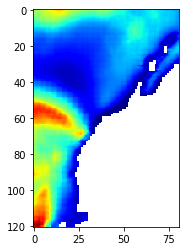

In [ ]:
plt.imshow(d1_Estres.isel(time=0).values,cmap='jet')

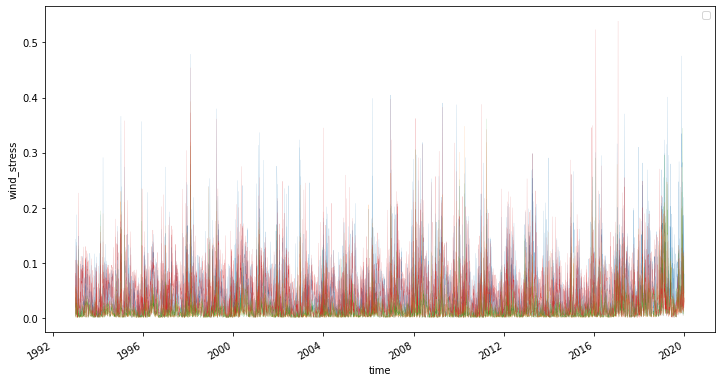

In [ ]:
C_Arena= d1_Estres.sel(lon=-123.5+360,lat=38.5).drop(['lat','lon'])
C_Reyes= d1_Estres.sel(lon=-123+360,lat=38).drop(['lat','lon'])
C_Nuevo= d1_Estres.sel(lon=-122+360,lat=37).drop(['lat','lon'])
C_Conception= d1_Estres.sel(lon=-120.75+360,lat=34.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
C_Arena.plot(linewidth=0.1)
C_Reyes.plot(linewidth=0.1)
C_Nuevo.plot(linewidth=0.1)
C_Conception.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Arena.to_dataframe(),C_Reyes.to_dataframe(),C_Nuevo.to_dataframe(),C_Conception.to_dataframe()],axis=1)
df_C.columns=['Pt Arena','Pt Reyes','Año Nuevo','Conception']
df_C.to_csv('Estres_California.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Pt Arena,Pt Reyes,Año Nuevo,Conception
time,,,,
1993-01-01,0.044376,0.059048,0.006901,0.003277
1993-01-02,0.076550,0.039352,0.036652,0.080750
1993-01-03,0.043251,0.017300,0.021400,0.071848
1993-01-04,0.003651,0.000648,0.000347,0.006800
1993-01-05,0.015751,0.012753,0.012901,0.017675


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
E_H=d1_Estres.groupby('lat').mean('lon').to_dataframe().reset_index()
E_H.to_csv('Hovmoller_Estres_California.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## MLD

In [4]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Diario/California/Data_anual/'
var = 'MLD' # elegir la variable de interes
ifile = 'GLOBAL_REANALYSIS_PHY_MLD.nc' # Elegir el archivo .nc
d1_MLD = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_MLD=d1_MLD.sel(time=filtro_meses(d1_MLD['time.month']))
d1_MLD.lon.values[d1_MLD.lon.values < 0] = d1_MLD.lon.values[d1_MLD.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_MLD

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Diario/California/Data_anual


<xarray.DataArray 'MLD' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 230.0 230.2 230.5 230.8 ... 249.2 249.5 249.8 250.0
  * lat      (lat) float32 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

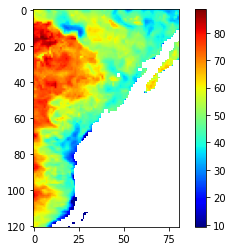

In [7]:
plt.imshow(d1_MLD.values[0,:,:],cmap='jet')
plt.colorbar()

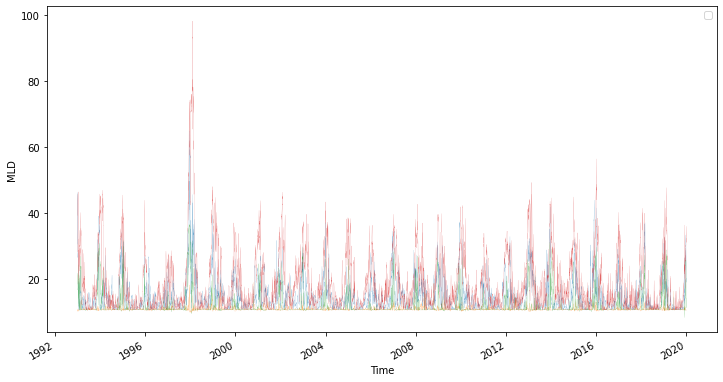

In [9]:
MLD_Arena= d1_MLD.sel(lon=-123.5+360,lat=38.5).drop(['lat','lon'])
MLD_Reyes= d1_MLD.sel(lon=-123+360,lat=38).drop(['lat','lon'])
MLD_Nuevo= d1_MLD.sel(lon=-122+360,lat=37).drop(['lat','lon'])
MLD_Conception= d1_MLD.sel(lon=-120.75+360,lat=34.5).drop(['lat','lon',])
plt.figure(figsize=(12,6))
MLD_Arena.plot(linewidth=0.1)
MLD_Reyes.plot(linewidth=0.1)
MLD_Nuevo.plot(linewidth=0.1)
MLD_Conception.plot(linewidth=0.1)
plt.legend()

In [10]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_MLD=pd.concat([MLD_Arena.to_dataframe(),MLD_Reyes.to_dataframe(),MLD_Nuevo.to_dataframe(),MLD_Conception.to_dataframe()],axis=1)
df_MLD.columns=['Pt Arena','Pt Reyes','Año Nuevo','Conception']
df_MLD.to_csv('MLD_California.csv',index=True,sep=',')
df_MLD.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Pt Arena,Pt Reyes,Año Nuevo,Conception
time,,,,
1993-01-01,30.664165,11.012137,18.533916,39.352997
1993-01-02,40.745304,10.381744,19.396879,39.950073
1993-01-03,43.213501,10.352325,21.592937,42.227200
1993-01-04,45.087929,10.322527,21.228966,45.537601
1993-01-05,45.435158,10.325960,21.326660,44.152699


In [12]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
MLD_H=d1_MLD.groupby('lat').mean('lon').to_dataframe().reset_index()
MLD_H.to_csv('Hovmoller_MLD_California.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia
